# Installing libraries and dependencies

In [3]:
#!pip install fpdf

In [4]:
import sys
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

from pathlib import Path
from fpdf import FPDF

# Defining directory paths

In [5]:
# Setting paths and directories
current_dir = Path(__file__).parent if "__file__" in locals() else Path.cwd()
database_path = current_dir / "CarWashDB.sql"
output_dir = current_dir / "output"

output_dir.mkdir(parents = True, exist_ok = True)

In [6]:
print(output_dir)

/Users/danielmontoya/Desktop/Python/MySQL-Python/output


# Database connection

In [ ]:
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "Password",
    database = "Group3DB"
)

# Queries

### Breakdown of Different Customer Cars

In [8]:
query = '''
SELECT v.Make, v.Model, COUNT(*) AS Vehicle_Count
FROM VEHICLE v
GROUP BY v.Make, v.Model
ORDER BY Vehicle_Count DESC;
'''

vehicle_breakdown = pd.read_sql(query, mydb)

/var/folders/dp/fs3klhcx3s7gsd4m5ntf_9440000gn/T/ipykernel_25368/3161231129.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vehicle_breakdown = pd.read_sql(query, mydb)


In [9]:
print(vehicle_breakdown)

             Make           Model  Vehicle_Count
0             GMC           Yukon              7
1          Toyota           Prius              7
2             GMC         Terrain              6
3           Honda          Accord              6
4      Volkswagen           Jetta              5
5            Audi              A4              5
6         Hyundai         Elantra              5
7             Kia          Optima              5
8          Subaru         Impreza              5
9           Mazda      MX-5 Miata              4
10      Chevrolet          Impala              4
11      Chevrolet          Malibu              4
12     Volkswagen            Golf              4
13          Mazda            CX-5              4
14         Nissan          Sentra              4
15           Ford           F-150              4
16           Audi              Q5              4
17            BMW        3 Series              4
18         Nissan          Maxima              3
19         Subaru   

In [10]:
# Cleaning data to sum the vehicle counts by make and sort in descending order

vehicle_breakdown = vehicle_breakdown.groupby('Make')['Vehicle_Count'].sum().reset_index()

vehicle_breakdown = vehicle_breakdown.sort_values(by = 'Vehicle_Count', ascending = False)

print(vehicle_breakdown)

             Make  Vehicle_Count
4             GMC             15
0            Audi             12
2       Chevrolet             11
13         Toyota             11
14     Volkswagen             11
5           Honda             10
6         Hyundai              9
12         Subaru              9
9           Mazda              8
11         Nissan              8
1             BMW              7
3            Ford              7
8             Kia              7
7            Jeep              5
10  Mercedes-Benz              5


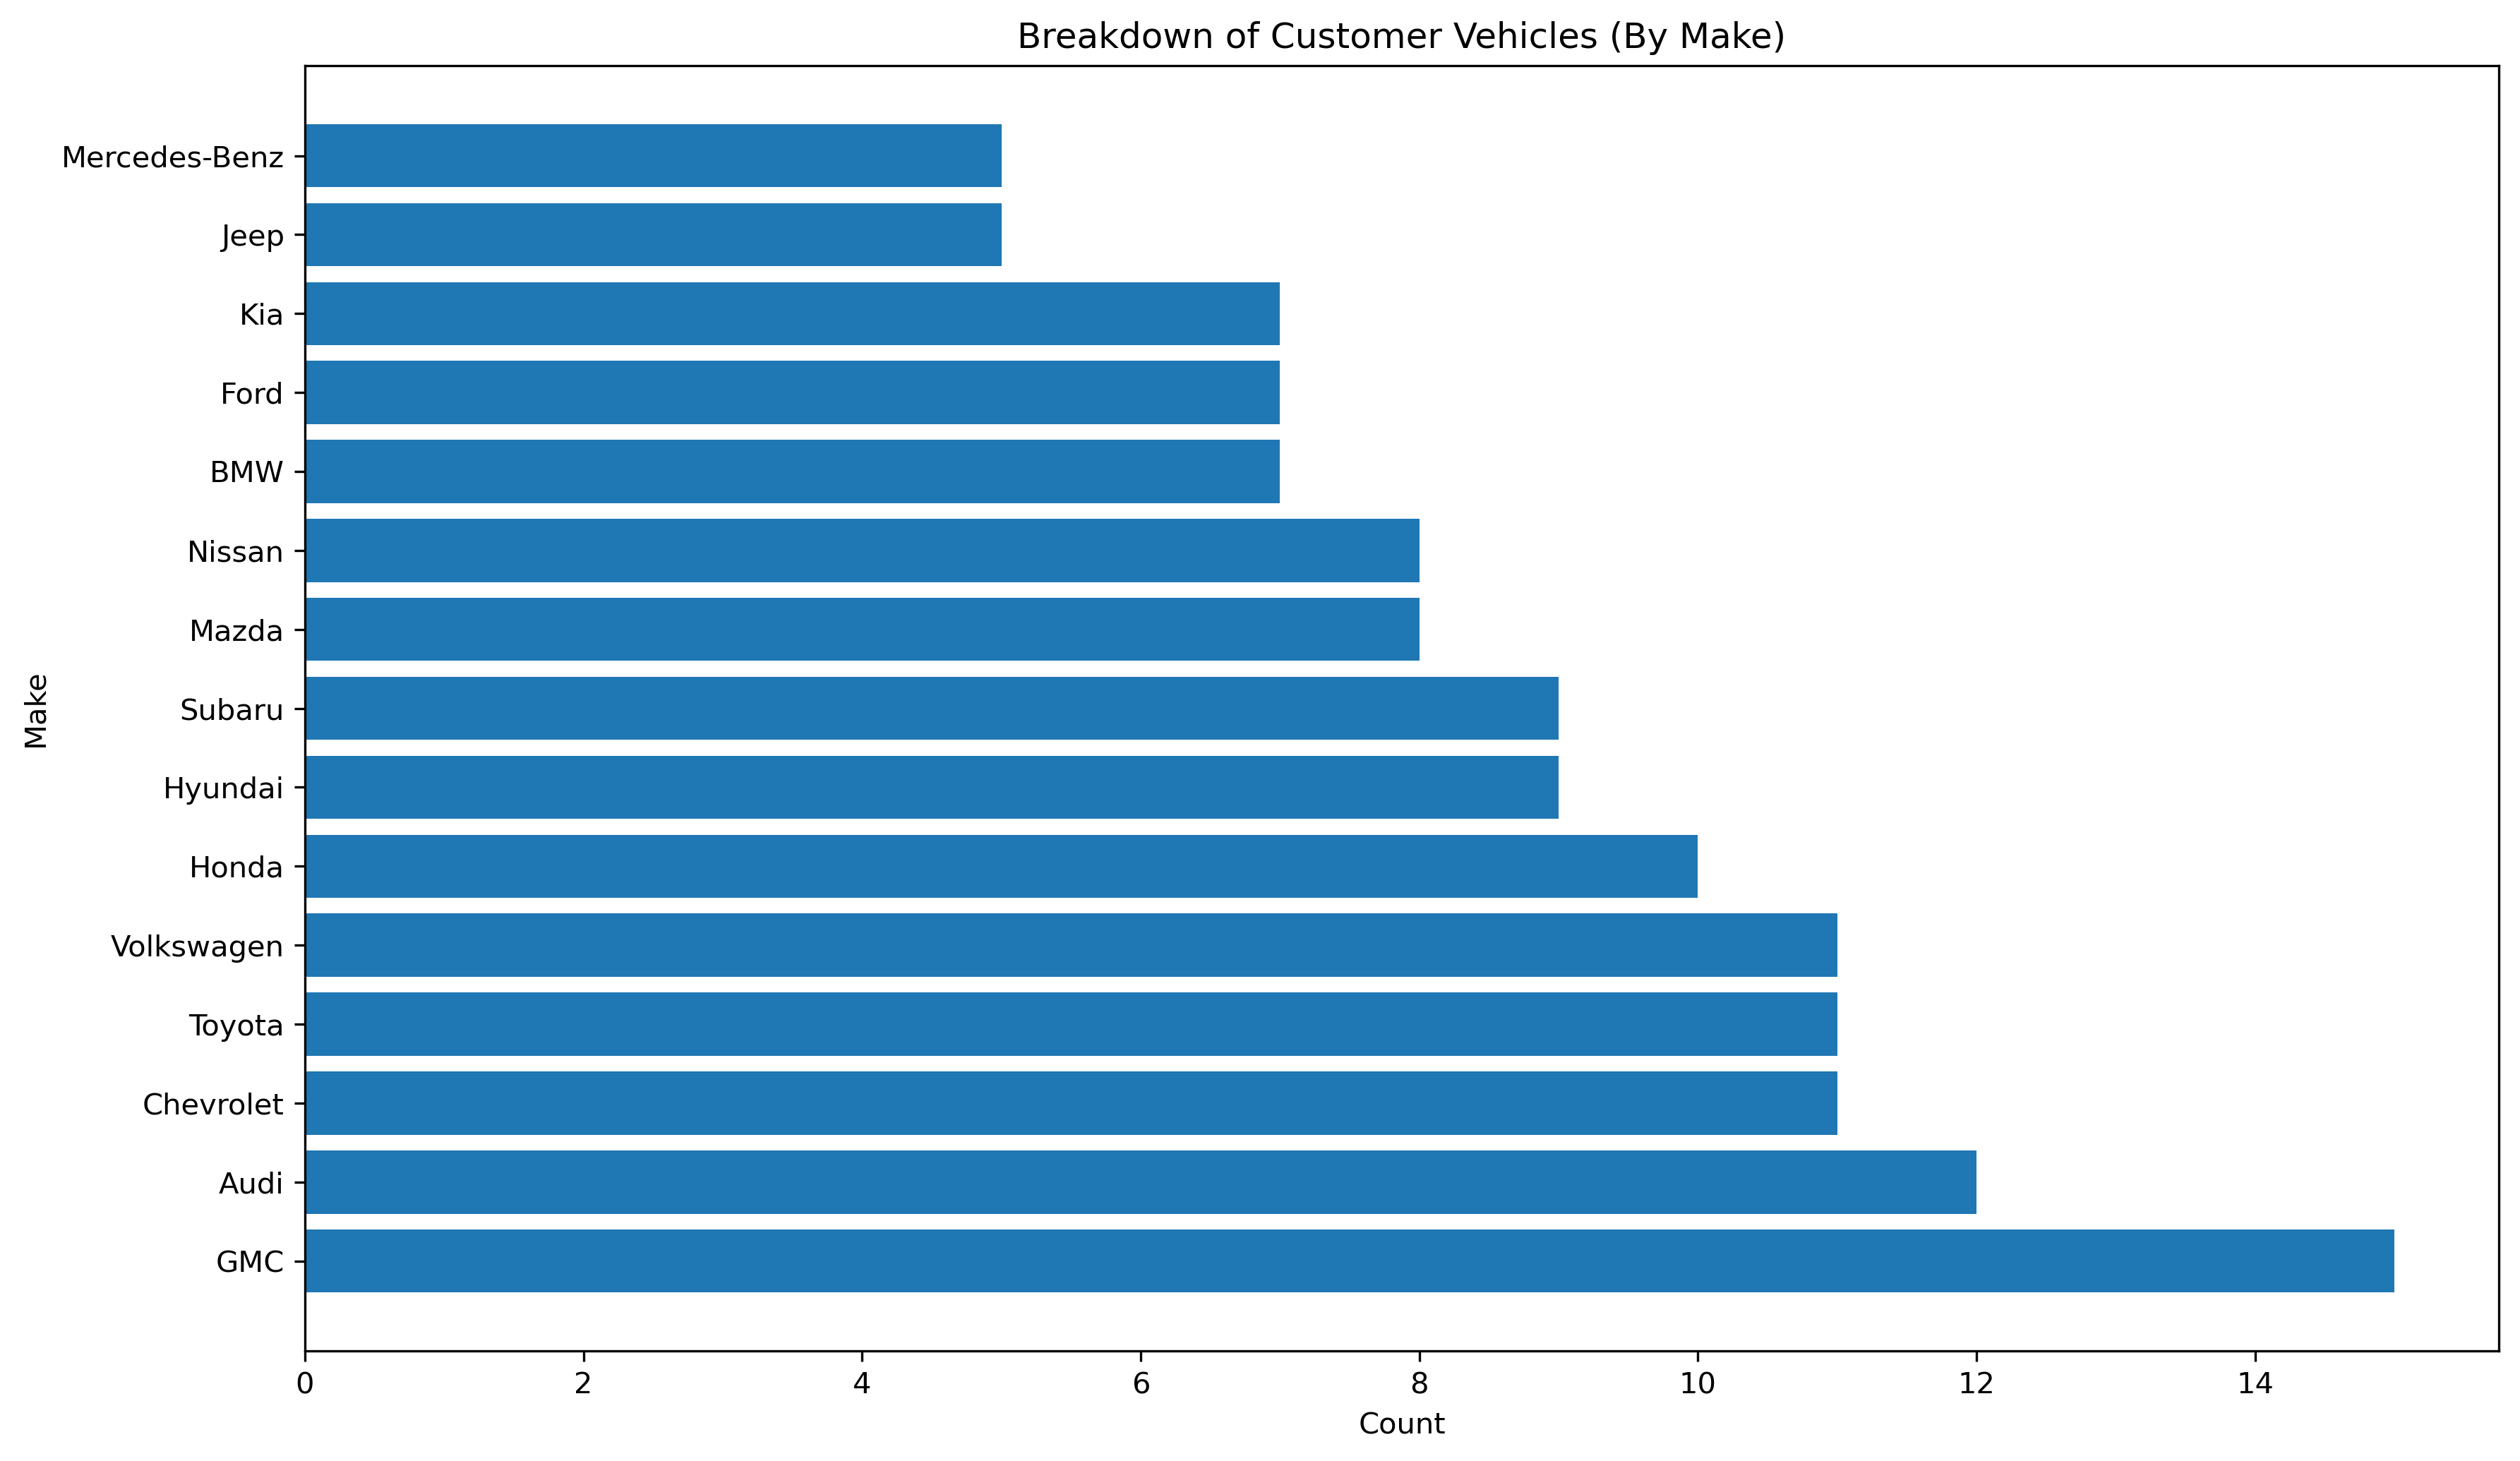

In [11]:
plt.figure(figsize = (12, 7), dpi = 300)
plt.barh(vehicle_breakdown['Make'], vehicle_breakdown['Vehicle_Count'])

plt.title('Breakdown of Customer Vehicles (By Make)')

plt.ylabel('Make')
plt.xlabel('Count')

plt.tight_layout()
plt.savefig(output_dir / 'Vehicle Breakdown.png')
plt.show()

### Most Popular Services (by year)

In [12]:
query = '''
SELECT 
    YEAR(t.Date) AS Year, 
    s.Wash_Type, 
    COUNT(ts.Service_ID) AS Times_Bought
FROM `TRANSACTION` t
JOIN TRANSACTION_SERVICE ts ON t.Trans_ID = ts.Trans_ID
JOIN SERVICE s ON ts.Service_ID = s.Service_ID
GROUP BY YEAR(t.Date), s.Wash_Type
ORDER BY Year, Times_Bought DESC;
'''

popular_services = pd.read_sql(query, mydb)

print(popular_services)

    Year           Wash_Type  Times_Bought
0   2023          Basic Wash            25
1   2023      Tire Detailing            21
2   2023     Exterior Polish            20
3   2023      Underbody Wash            18
4   2023       Wax and Shine            17
5   2023  Interior Detailing            15
6   2023     Glass Treatment            15
7   2023     Engine Cleaning            11
8   2023         Deluxe Wash             8
9   2023        Full Service             6
10  2024          Basic Wash            99
11  2024      Tire Detailing            77
12  2024       Wax and Shine            74
13  2024     Glass Treatment            65
14  2024      Underbody Wash            62
15  2024     Exterior Polish            56
16  2024     Engine Cleaning            54
17  2024  Interior Detailing            51
18  2024         Deluxe Wash            38
19  2024        Full Service            24


/var/folders/dp/fs3klhcx3s7gsd4m5ntf_9440000gn/T/ipykernel_25368/3708395876.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  popular_services = pd.read_sql(query, mydb)


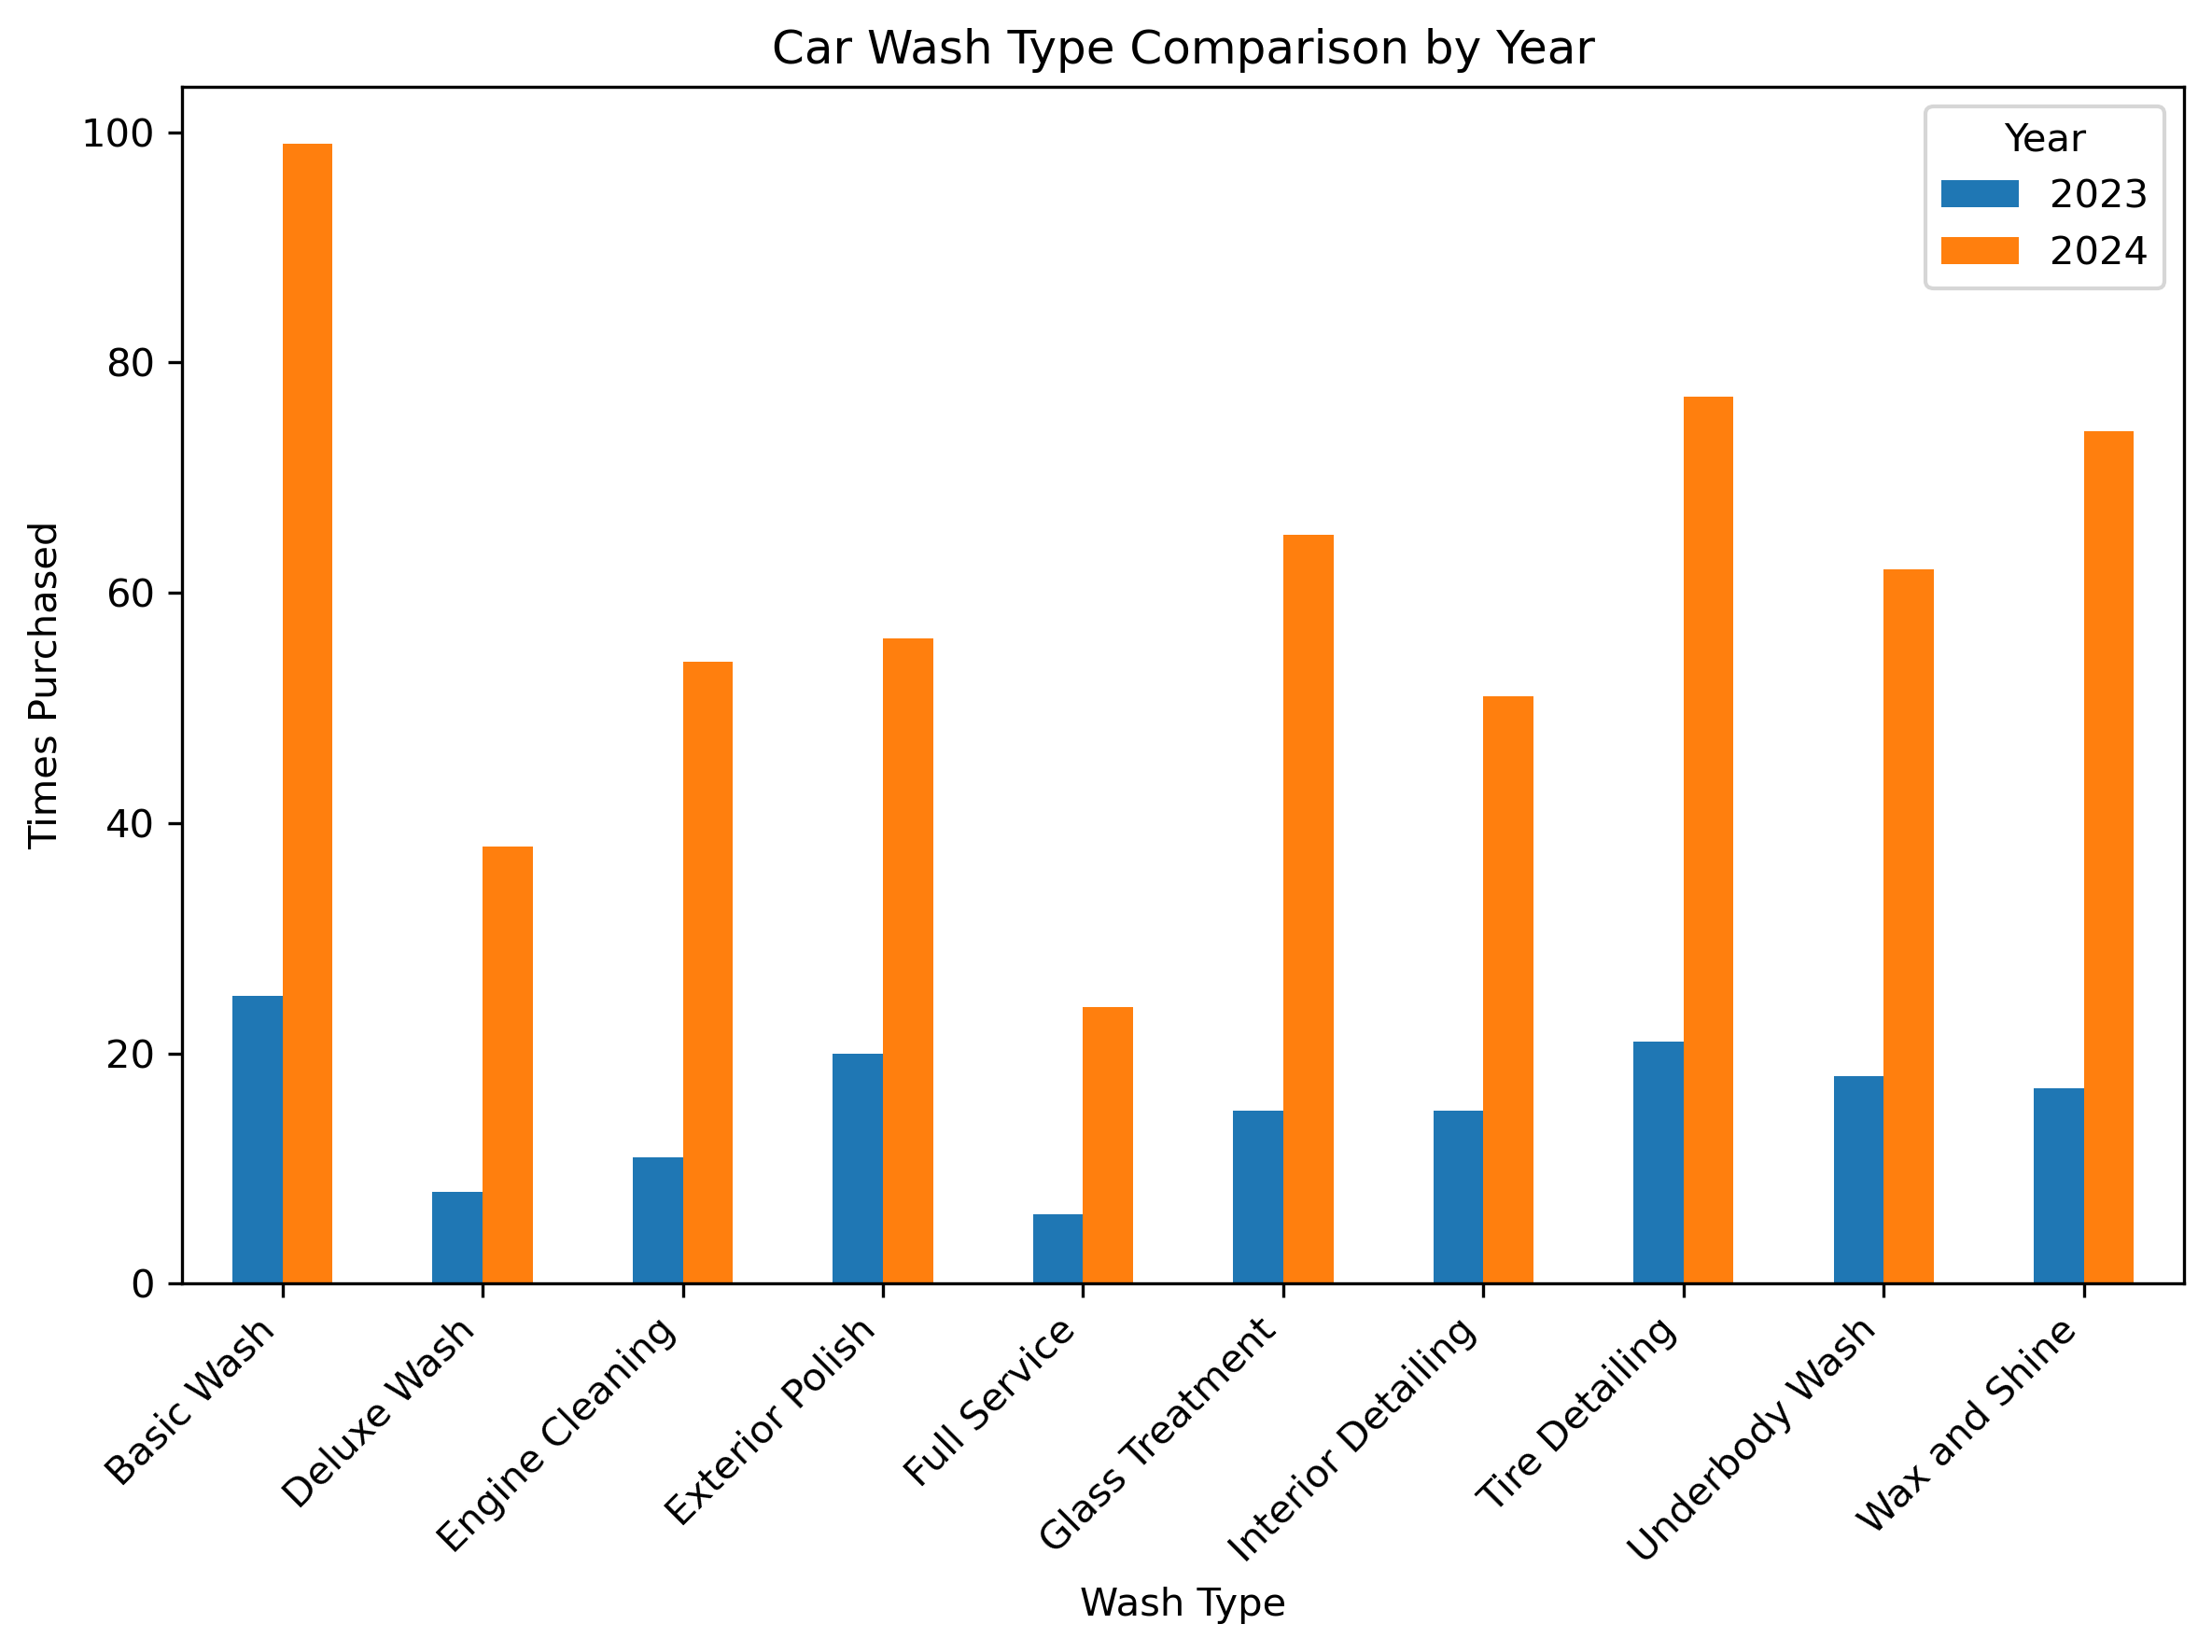

In [13]:
# Convering dataframe into pivot df for plotting
pivot_pop_services = popular_services.pivot(index='Wash_Type', columns='Year', values='Times_Bought')

# Plot
plt.rcParams["figure.dpi"] = 300                # sets dpi to 300 for higher resolution
pivot_pop_services.plot(kind='bar', figsize=(8, 6))
plt.title('Car Wash Type Comparison by Year')
plt.ylabel('Times Purchased')
plt.xlabel('Wash Type', loc = 'center')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()

plt.savefig(output_dir / 'Wash Type Comparison.png')

plt.show()


### Monthly Revenue Breakdown

In [14]:
query = '''
SELECT 
    YEAR(t.Date) AS Year, 
    MONTH(t.Date) AS Month, 
    SUM(t.Total_Cost) AS Monthly_Revenue
FROM `TRANSACTION` t
GROUP BY YEAR(t.Date), MONTH(t.Date)
ORDER BY Year, Month;
'''

revenue = pd.read_sql(query, mydb)

/var/folders/dp/fs3klhcx3s7gsd4m5ntf_9440000gn/T/ipykernel_25368/539703204.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  revenue = pd.read_sql(query, mydb)


In [15]:
print(revenue)

    Year  Month  Monthly_Revenue
0   2023     11          2134.83
1   2023     12          2586.66
2   2024      1          2226.87
3   2024      2          1468.37
4   2024      3          2205.26
5   2024      4          2312.55
6   2024      5          2064.38
7   2024      6           755.32
8   2024      7          1559.33
9   2024      8          2084.97
10  2024      9          1768.50
11  2024     10          1740.34
12  2024     11           386.88


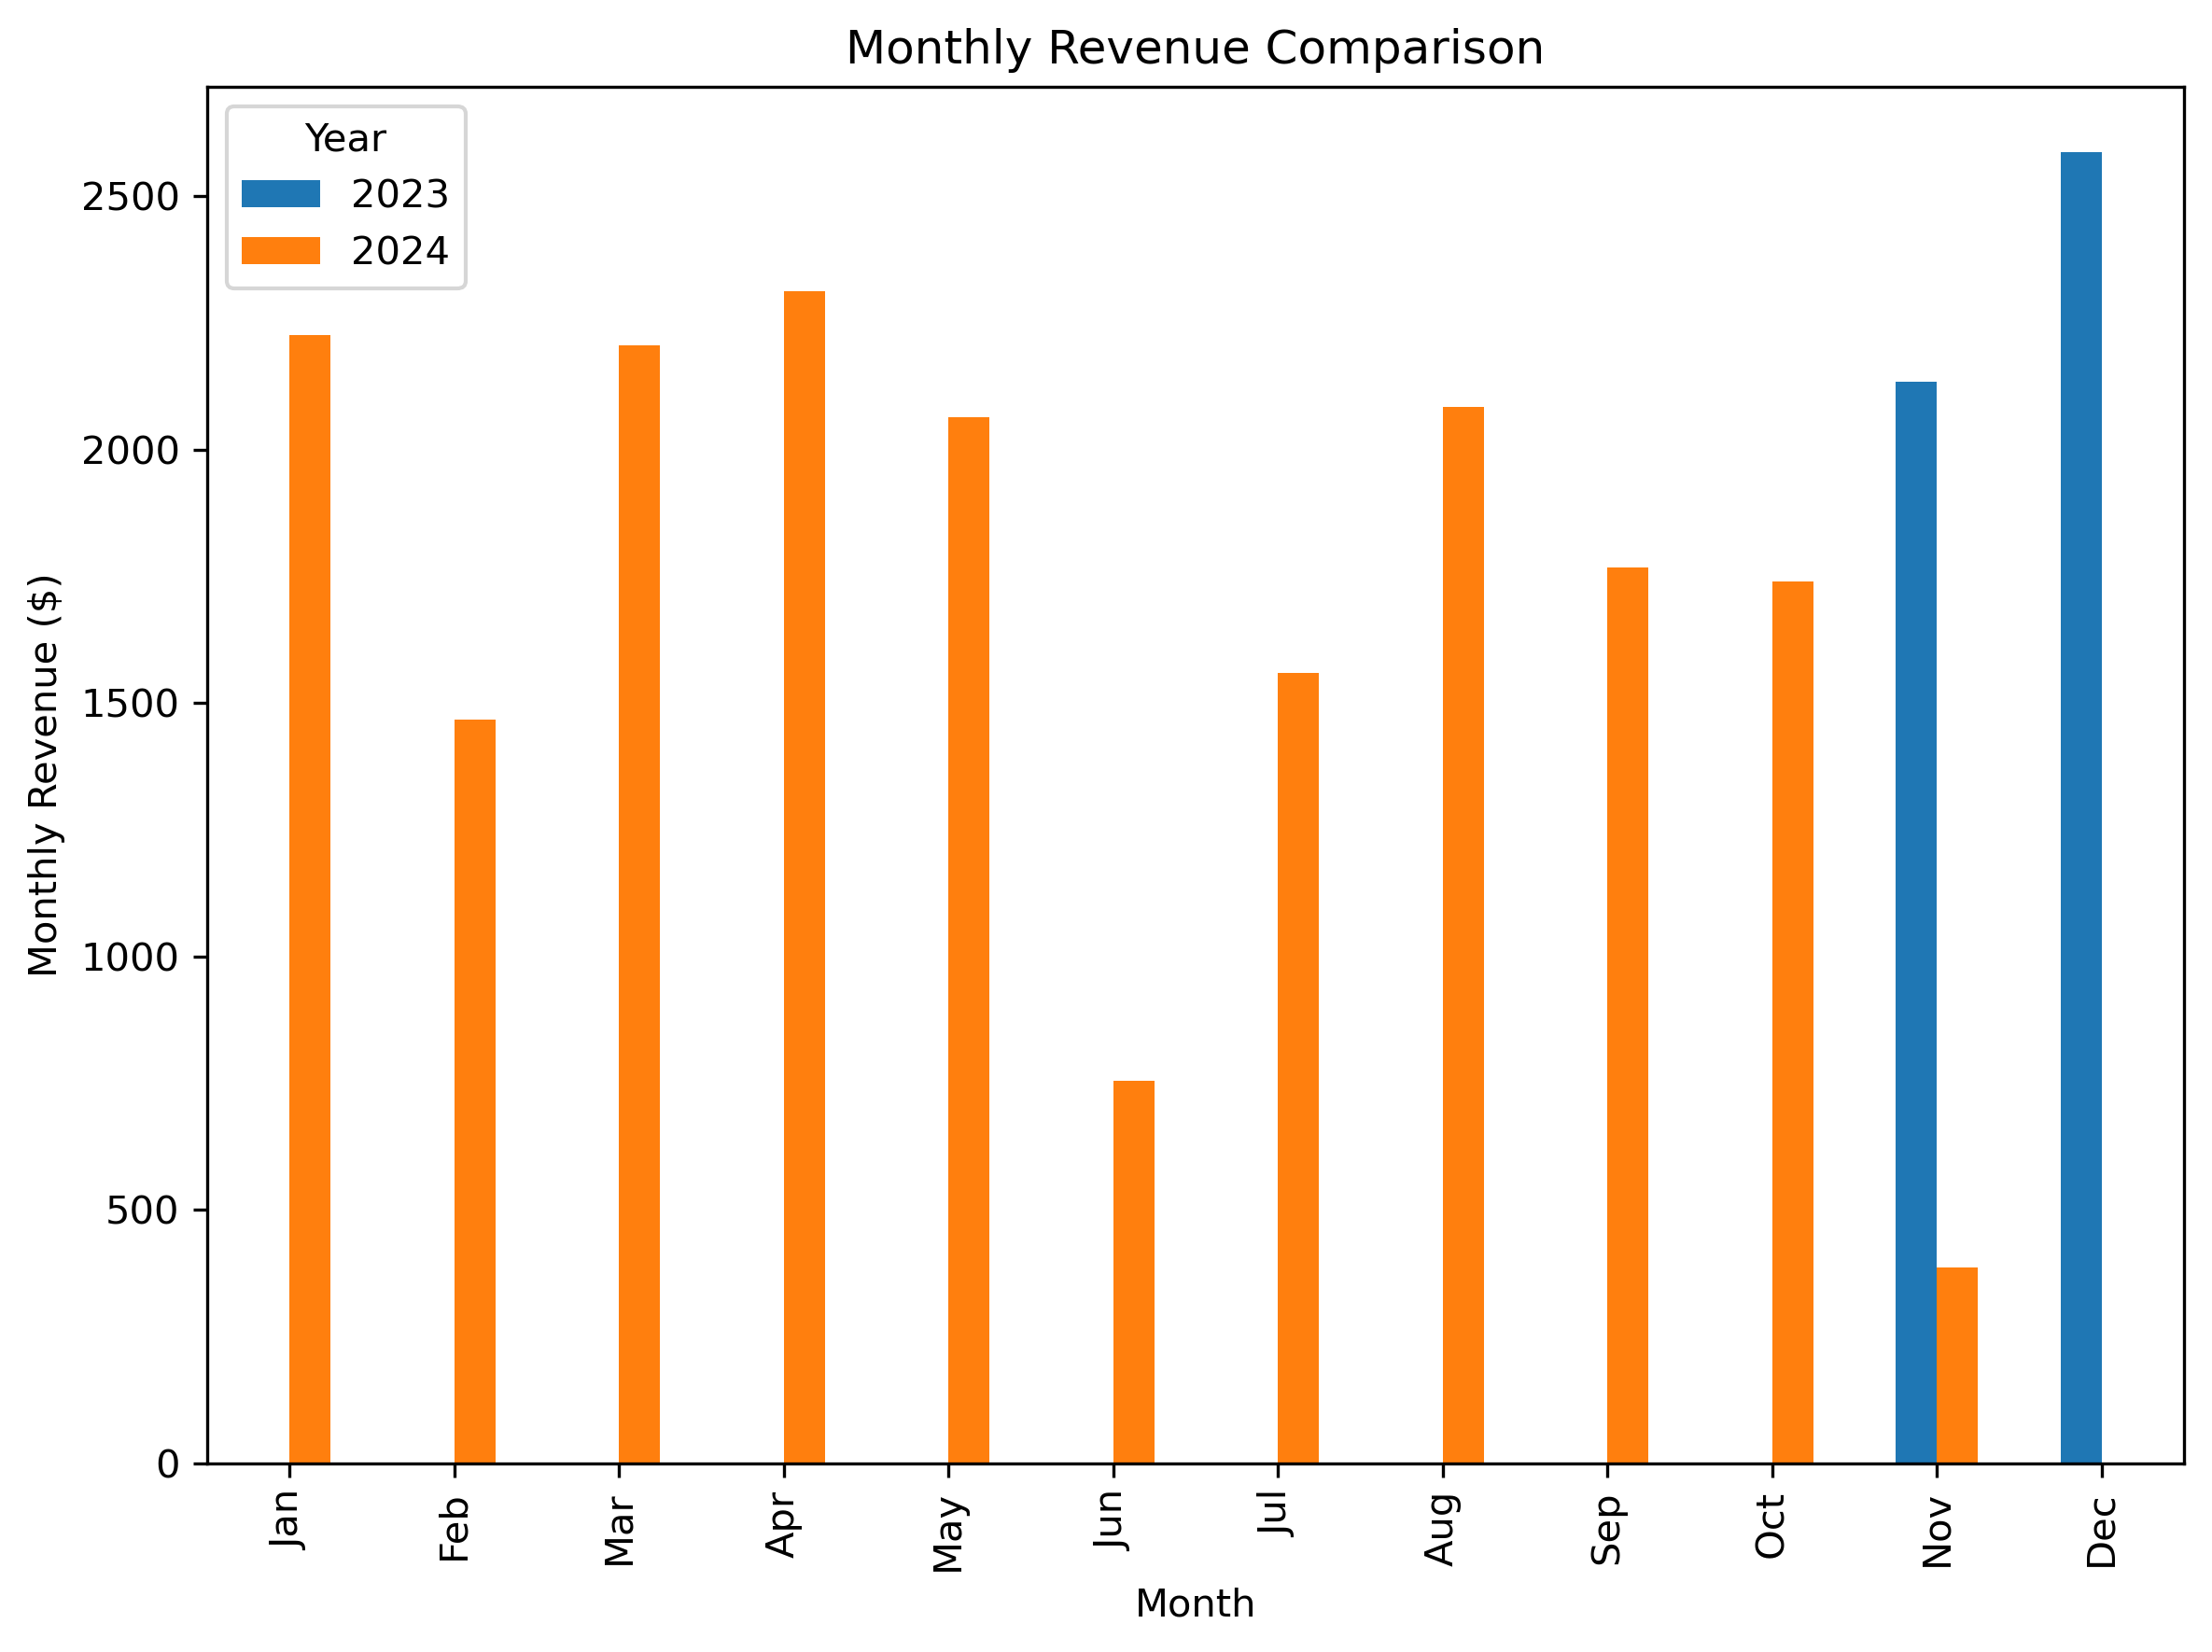

In [21]:
# Making a dataframe into a pivot dataframe for better plotting
pivot_revenue = revenue.pivot(index = 'Month', columns = 'Year', values = 'Monthly_Revenue')
plt.rcParams["figure.dpi"] = 300
pivot_revenue.plot(kind = 'bar', figsize = (8,6))

plt.title('Monthly Revenue Comparison')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue ($)')

plt.xticks(ticks = range(0,12), labels = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
plt.legend(title = 'Year')
plt.tight_layout()

plt.savefig(output_dir / 'Revenue by Month.png')

plt.show()



# Creating PDF Report

In [20]:
# Defining page properties

font_color = (64, 64, 64)

chart_filenames = [str(chart_path) for chart_path in output_dir.glob("*.png")]

pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 24)

title = f"Car Wash Report as of {date.today().strftime('%m/%d/%Y')}"
pdf.set_text_color(*font_color)
pdf.cell(0, 20, title, align = 'C', ln = 1)

for chart_filename in chart_filenames:
    pdf.ln(10)
    pdf.image(chart_filename, x = None, y = None, w = pdf.w - 20, h = 0)

pdf.output(output_dir / "Report.pdf", "F")

''